In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
business = pd.read_csv('superstore.csv', encoding = 'latin1')

business

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
print("\mMissing values:\n", business.isnull().sum())

\mMissing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [4]:
business['Order Date'] = pd.to_datetime(business["Order Date"])
business['Ship Date'] = pd.to_datetime(business["Ship Date"])

business["Year"] = business["Order Date"].dt.year
business["Month"] = business["Order Date"].dt.month_name()
business["Weekday"] = business["Order Date"].dt.day_name()

print("shape of the dataset:", business.shape)
print("\nColumns:\n", business.columns.tolist())
print("\nPreview of data:\n")
display(business.head())

shape of the dataset: (9994, 24)

Columns:
 ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Weekday']

Preview of data:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Weekday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,November,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,November,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,June,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,October,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,October,Sunday


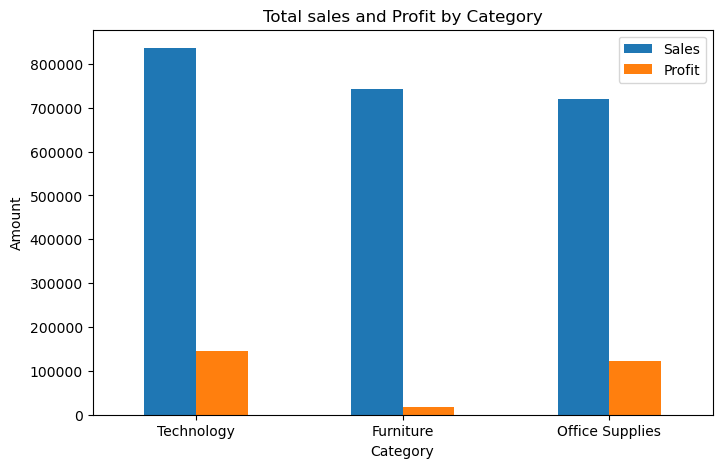

In [5]:
category_summary = business.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending = False)

category_summary.plot(kind = 'bar', figsize = (8,5))
plt.title("Total sales and Profit by Category")
plt.ylabel("Amount")
plt.xlabel("Category")
plt.xticks(rotation = 0)
plt.show()

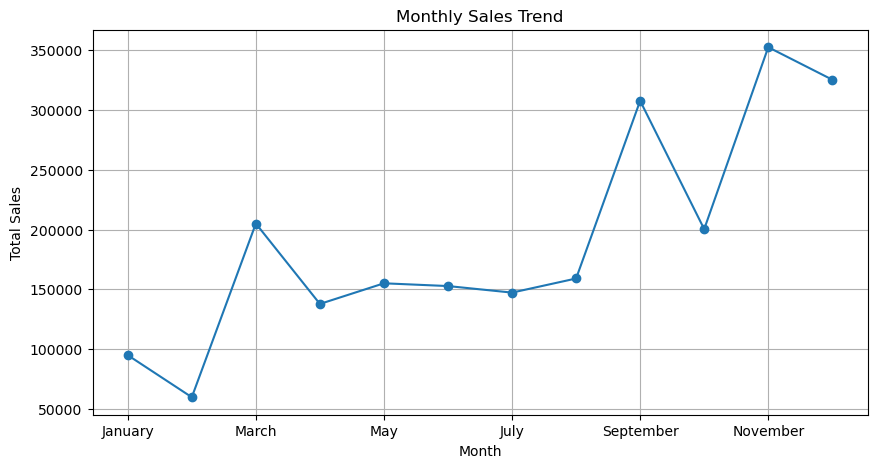

In [6]:
#monthly sales trend 

monthly_sales = business.groupby('Month')['Sales'].sum().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

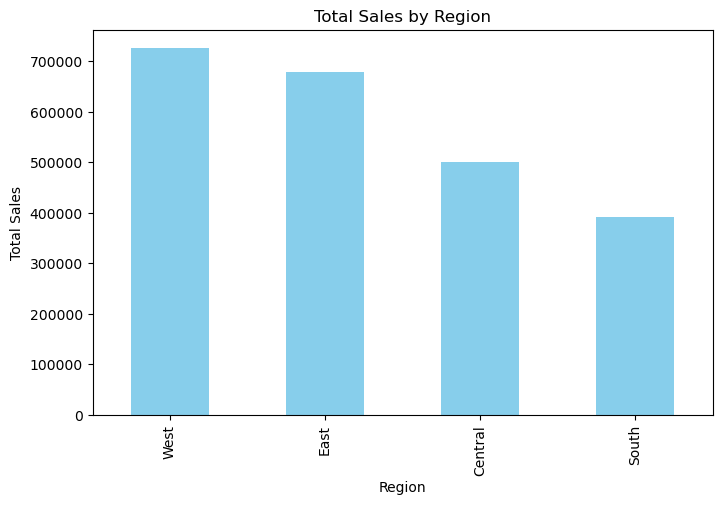

In [7]:
#sales by the region
region_sales = business.groupby('Region')['Sales'].sum().sort_values(ascending = False)
region_sales.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


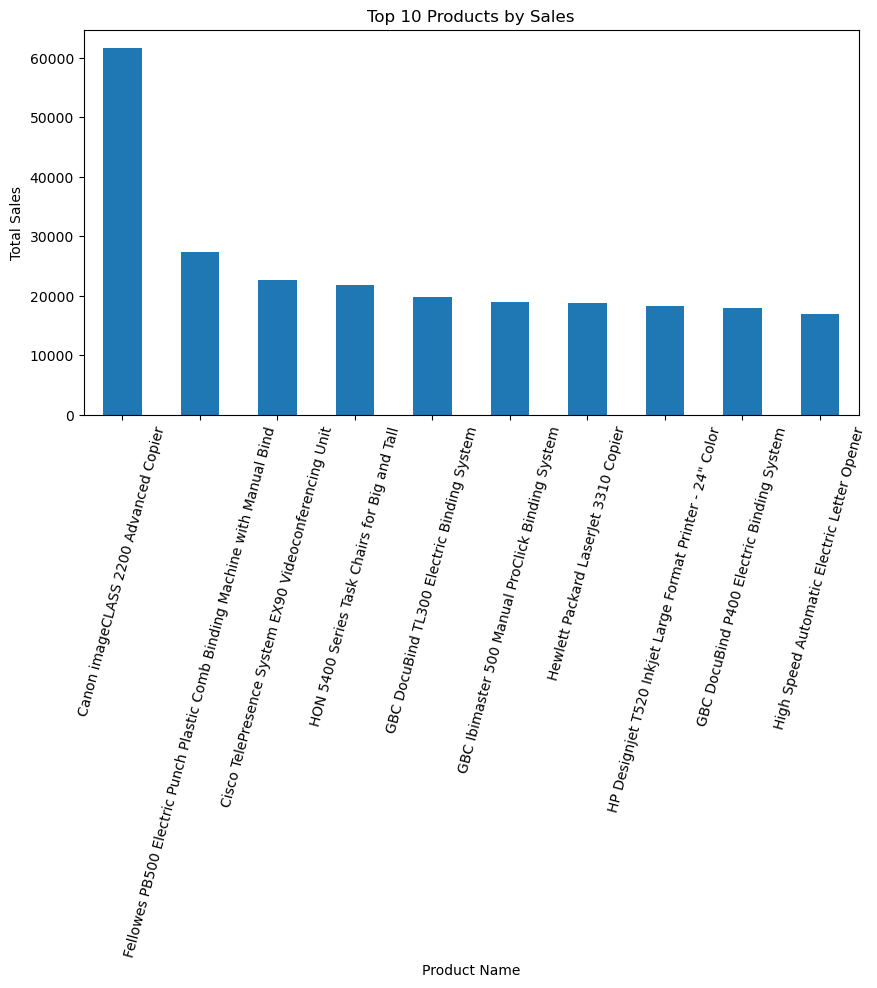

In [8]:
#product by sales
top_products = business.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.xlabel("Product Name")
plt.xticks(rotation=75)
plt.show()

In [9]:
#automating business report 
#latest year-month from the data 

latest_year = business['Year'].max()
latest_month = business.loc[business['Year'] == latest_year, 'Month'].mode()[0]

#filtering the data for the last month

latest_data = business[business['Month'] == latest_month]
#kpis..

total_sales = latest_data['Sales'].sum()
total_profit = latest_data['Profit'].sum()
avg_discount = latest_data['Discount'].mean()
top_category = latest_data.groupby('Category')['Sales'].sum().idxmax()
top_city = latest_data.groupby('City')['Sales'].sum().idxmax()

#generating the insights

report = f"""

Generated on: {datetime.date.today().strftime('%B %d, %Y')}

Month Analyzed: {latest_month} {latest_year}

Total Sales:₦{total_sales:,.2f}
Total Profit: ₦{total_profit:,.2f}
Average Discount: {avg_discount:.2%}

Top Performing Category: {top_category}
Top Performing City: {top_city}

- Business performance was {"strong" if total_profit > 0 else "weak"} this month.
- {top_category} continues to drive the most sales.
- {top_city} showed the highest regional sales.
"""

report







'\n\nGenerated on: October 12, 2025\n\nMonth Analyzed: December 2017\n\nTotal Sales:₦325,293.50\nTotal Profit: ₦43,369.19\nAverage Discount: 15.04%\n\nTop Performing Category: Furniture\nTop Performing City: New York City\n\n- Business performance was strong this month.\n- Furniture continues to drive the most sales.\n- New York City showed the highest regional sales.\n'

In [10]:
# Save the generated report to a text file
with open("monthly_business_report.txt", "w", encoding="utf-8") as f:
    f.write(report)

print("✅ Report saved as 'monthly_business_report.txt'")


✅ Report saved as 'monthly_business_report.txt'


In [19]:
import os
from dotenv import load_dotenv

load_dotenv()

print("Account SID:", os.getenv('ACed2487c20bc60d21e0007bcd00bcaae1'))
print("Auth Token:", os.getenv('9b9b76ddf3acb31c6e3be7a6013baf7c'))


Account SID: None
Auth Token: None


In [20]:
import requests

r = requests.get("https://api.twilio.com")
print(r.status_code)


200


In [21]:
import socket

try:
    host = "api.twilio.com"
    print("Resolving:", host)
    ip = socket.gethostbyname(host)
    print("Twilio IP:", ip)
except Exception as e:
    print("DNS issue:", e)


Resolving: api.twilio.com
Twilio IP: 108.139.203.9


In [25]:
#lets send our report to whatsapp
!pip install twilio python-dotenv


import os
from twilio.rest import Client
from dotenv import load_dotenv

load_dotenv()
account_sid=('ACed2487c20bc60d21e0007bcd00bcaae1')
auth_token=('9b9b76ddf3acb31c6e3be7a6013baf7c')
from_whatsapp_number=("whatsapp:+14155238886")
to_whatsapp_number=("whatsapp:+2347033270878")

client = Client(account_sid, auth_token)
with open("monthly_business_report.txt", "r", encoding="utf-8") as f:
    report_message = f.read()
    
message = client.messages.create(
    body=report_message,
from_=from_whatsapp_number,
to=to_whatsapp_number)

print("Report sent succesfully")
print("Message SID", message.sid)

Report sent succesfully
Message SID SM847b09c12c617dda538534a9bc30f309
